In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.exceptions import ConvergenceWarning

import warnings

In [22]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
df = pd.read_csv('day.csv')
df.head(5)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [9]:
df.drop(['instant', 'dteday'], inplace=True, axis=1)

In [7]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix['cnt'].abs().sort_values(ascending=False)

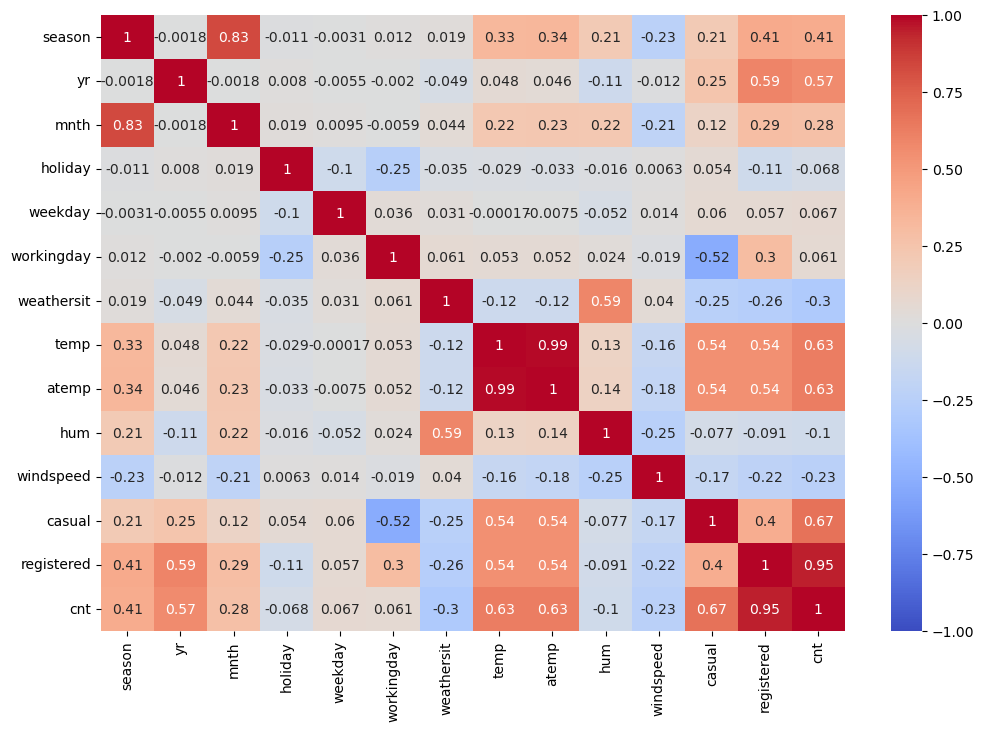

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

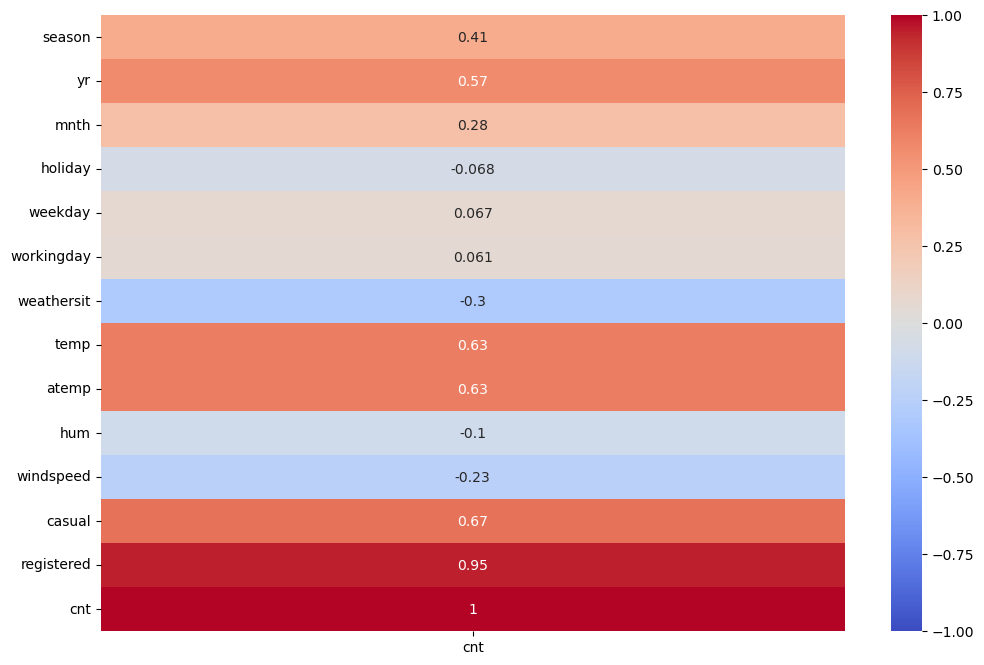

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['cnt']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [15]:
correlation_threshold = 0.2
high_correlation_features = target_correlation[target_correlation > correlation_threshold].index.tolist()
high_correlation_features

['cnt',
 'registered',
 'casual',
 'atemp',
 'temp',
 'yr',
 'season',
 'weathersit',
 'mnth',
 'windspeed']

In [18]:
selected_features = ['temp', 'windspeed']

In [19]:
X = df[selected_features]
y = df['cnt']

In [20]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
X_scaled.shape

(731, 2)

# K-Means

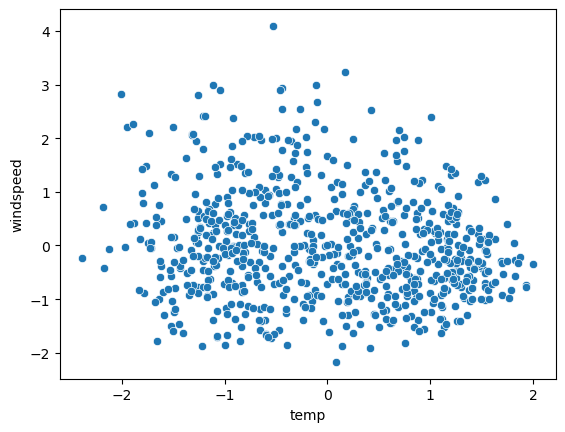

In [23]:
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:, 1])
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.show()

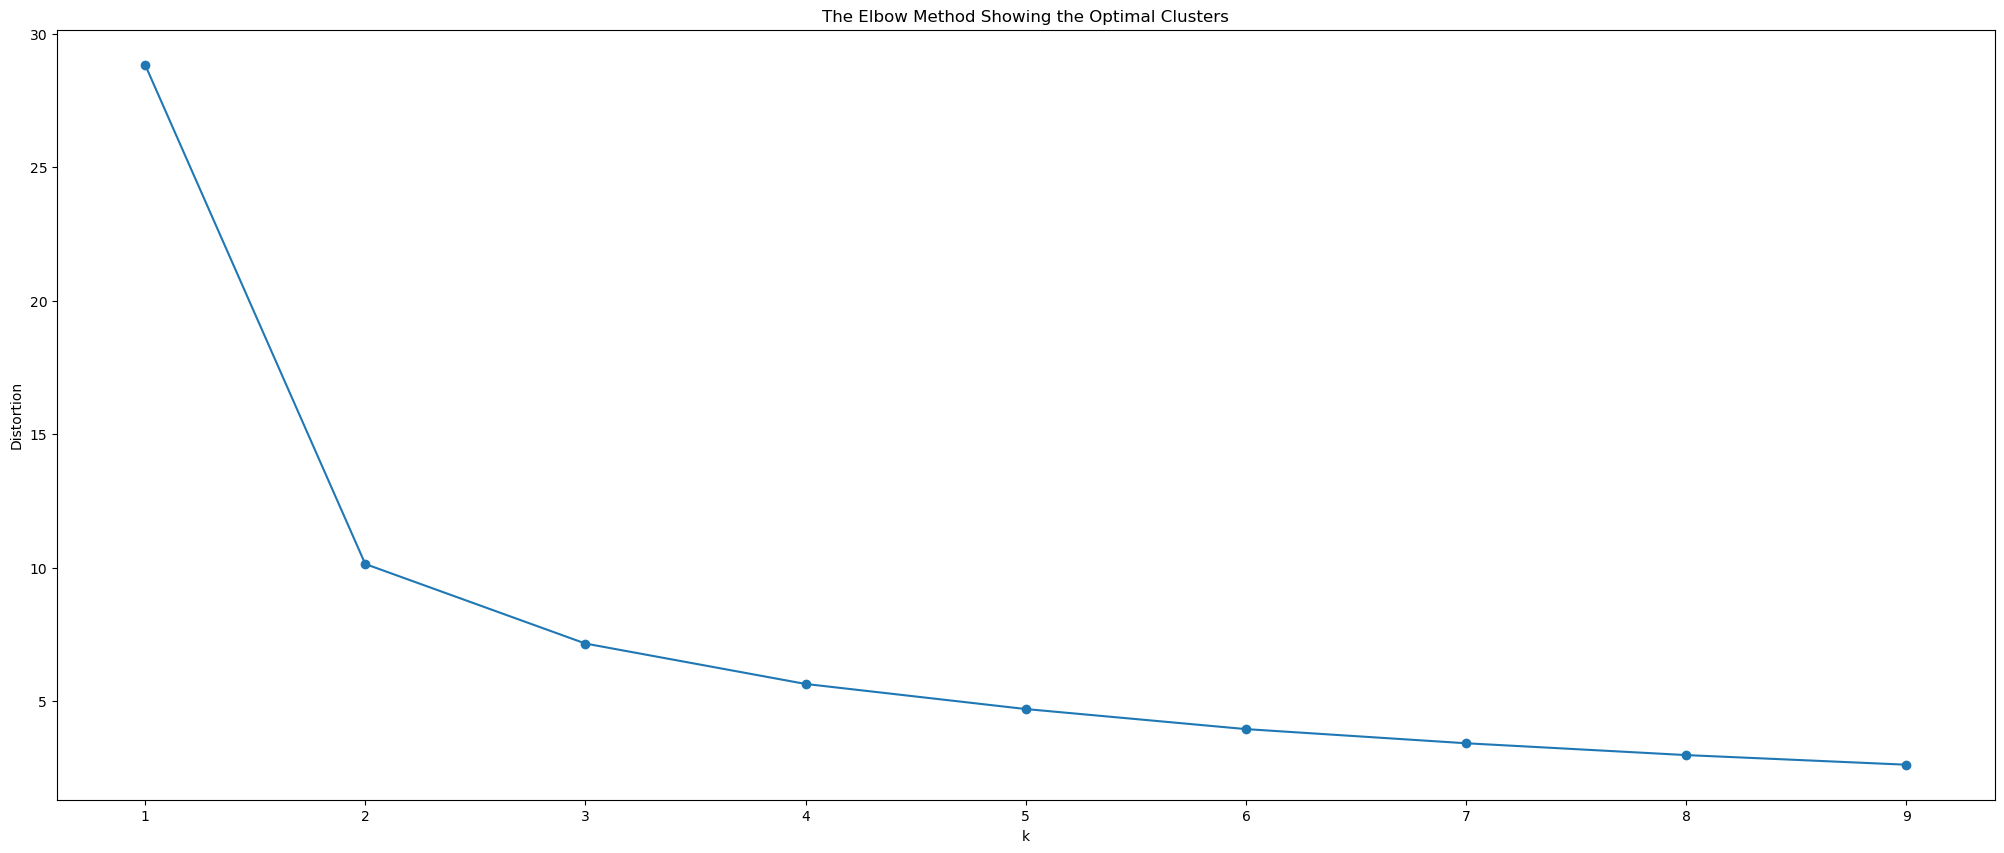

In [23]:
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize = (25, 10))
plt.plot(K, distortions, 'o-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing the Optimal Clusters')
plt.show()

In [24]:
distortions

[28.844918610448758,
 10.143486986114642,
 7.163754567927654,
 5.650168518564609,
 4.710593616204814,
 3.9592196769704855,
 3.4290039343262904,
 2.985903460148683,
 2.625152892893784]

In [27]:
def plot_kmeans_clusters(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_

    plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k', s=50)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='red')
    plt.title(f'K-means Clustering (k={n_clusters})')
    plt.xlabel(selected_features[0])
    plt.ylabel(selected_features[1])
    plt.show()

In [37]:
scores = []
n_clusters = list(range(2,6))

K-means with k=2: Silhouette Score = 0.38766480481734794


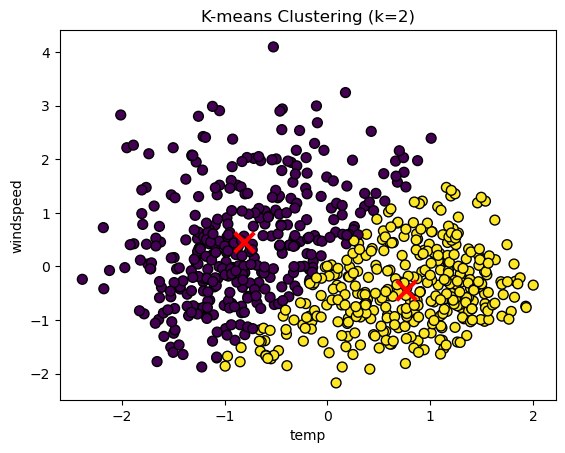

K-means with k=3: Silhouette Score = 0.41654993560077136


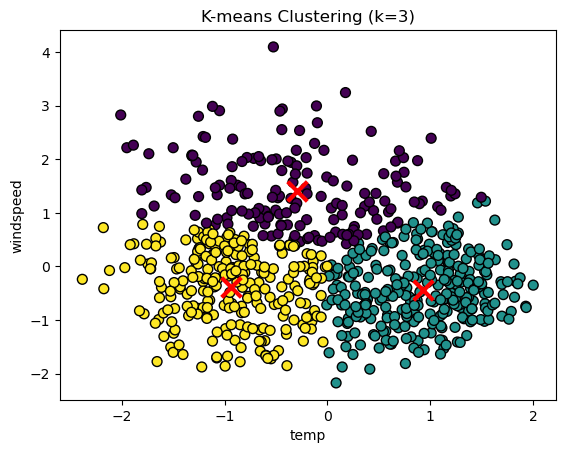

K-means with k=4: Silhouette Score = 0.3822324574179123


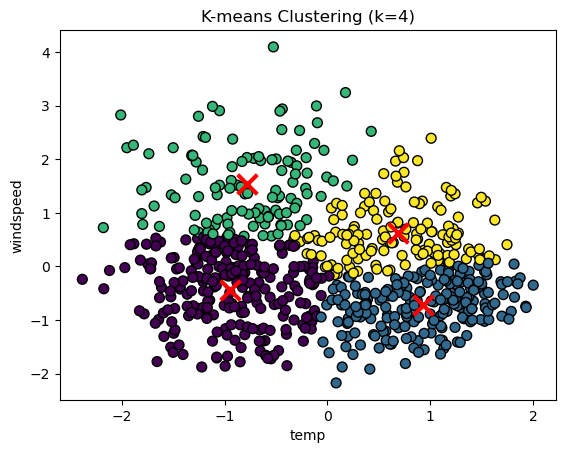

K-means with k=5: Silhouette Score = 0.37670487892883414


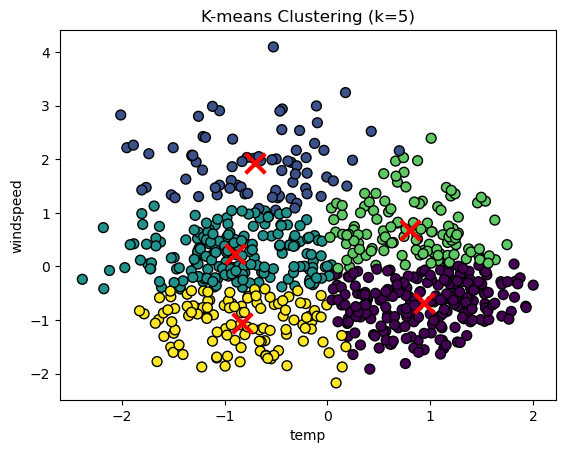

In [38]:
for k in n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, kmeans_labels)
    print(f'K-means with k={k}: Silhouette Score = {silhouette_avg}')
    scores.append(silhouette_avg)
    plot_kmeans_clusters(X_scaled, k)

K-means with k=3: Silhouette Score = 0.41654993560077136


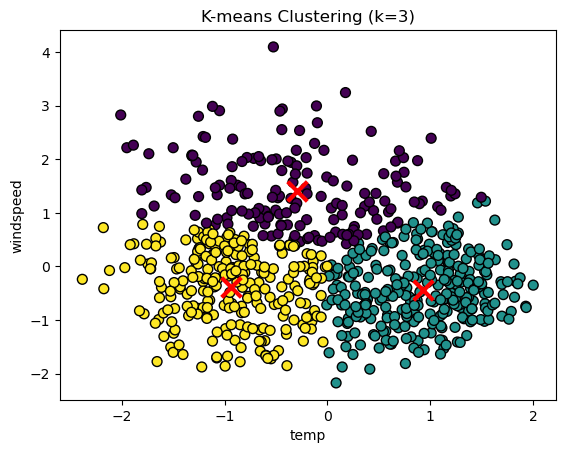

In [40]:
best_score_index = np.argmax(scores)

kmeans = KMeans(n_clusters=n_clusters[best_score_index], random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, kmeans_labels)
print(f'K-means with k={n_clusters[best_score_index]}: Silhouette Score = {silhouette_avg}')
plot_kmeans_clusters(X_scaled, n_clusters[best_score_index])

# Agglomerative Clustering

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage

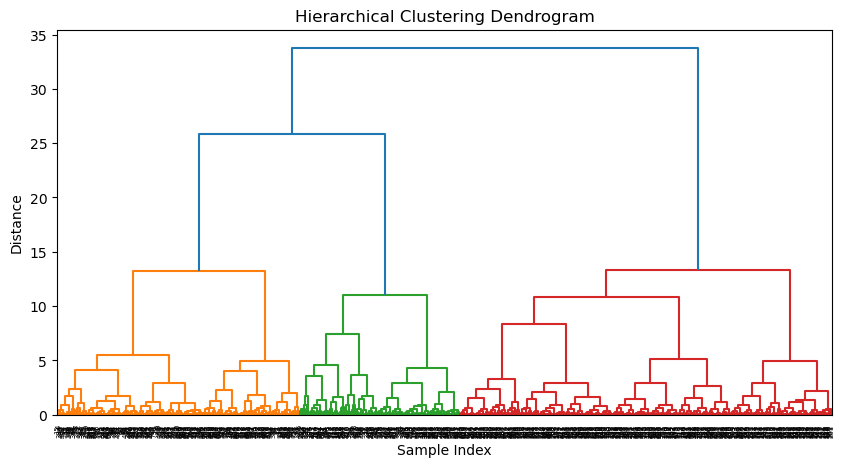

In [48]:
linked = linkage(X_scaled, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [25]:
def plot_agglomerative_clusters(X, n_clusters):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    agglomerative_labels = agglomerative.fit_predict(X)

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=agglomerative_labels, cmap='viridis', edgecolors='k', s=50)

     # Calculate and plot cluster centroids
    for label in np.unique(agglomerative_labels):
        cluster_points = X[agglomerative_labels == label]
        cluster_center = np.mean(cluster_points, axis=0)
        plt.scatter(cluster_center[0], cluster_center[1], marker='x', s=200, linewidths=3, color='red')

    plt.title(f'Agglomerative Clustering (k={n_clusters})')
    plt.xlabel(selected_features[0])
    plt.ylabel(selected_features[1])
    plt.show()

In [26]:
scores = []
n_clusters = list(range(2,6))

Agglomerative Clustering with k=2: Silhouette Score = 0.3703575804078194


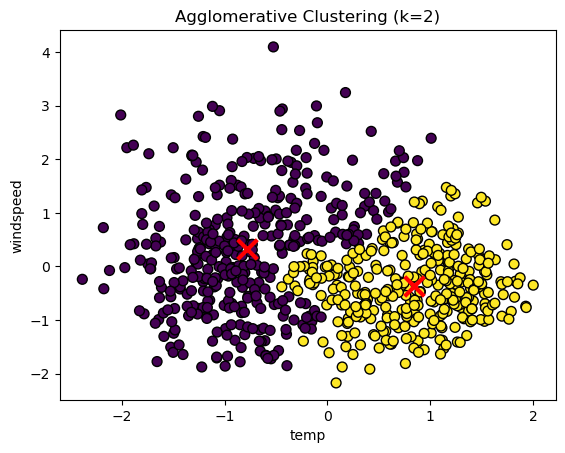

Agglomerative Clustering with k=3: Silhouette Score = 0.40240265055349067


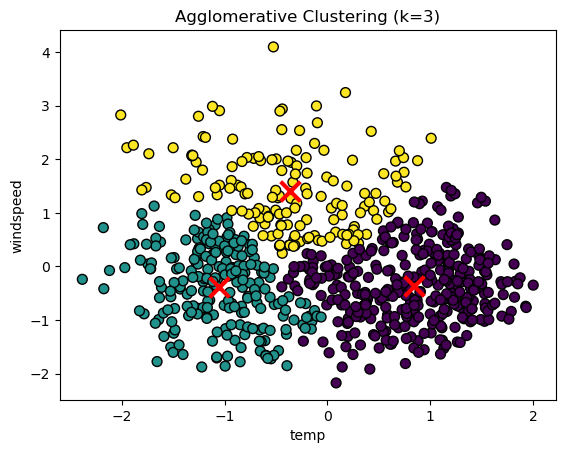

Agglomerative Clustering with k=4: Silhouette Score = 0.31375156819286976


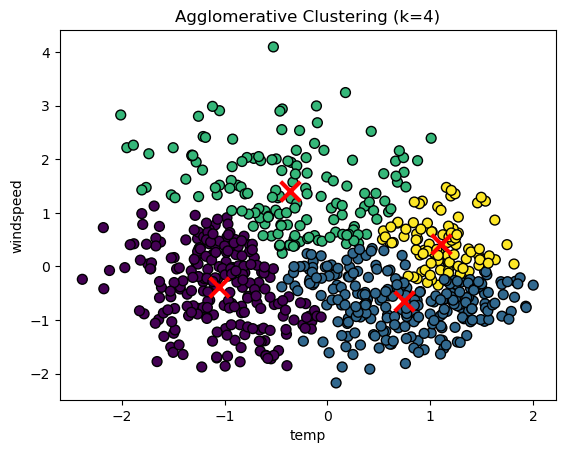

Agglomerative Clustering with k=5: Silhouette Score = 0.2940521424636317


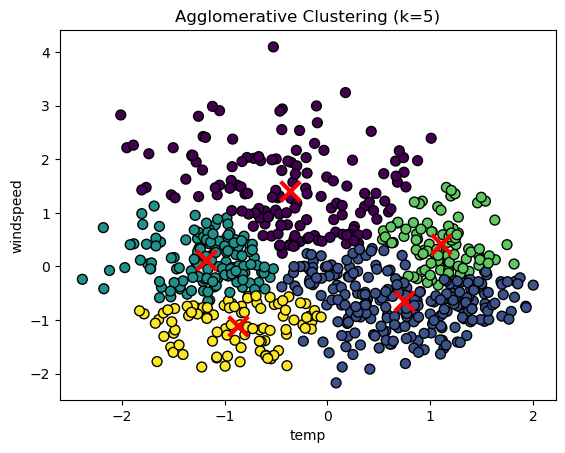

In [27]:
for k in n_clusters:
    agglomerative = AgglomerativeClustering(n_clusters=k)
    agglomerative_labels = agglomerative.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, agglomerative_labels)
    print(f'Agglomerative Clustering with k={k}: Silhouette Score = {silhouette_avg}')
    scores.append(silhouette_avg)

    plot_agglomerative_clusters(X_scaled, k)

Best Agglomeratice Clustering with k=3: Silhouette Score = 0.40240265055349067


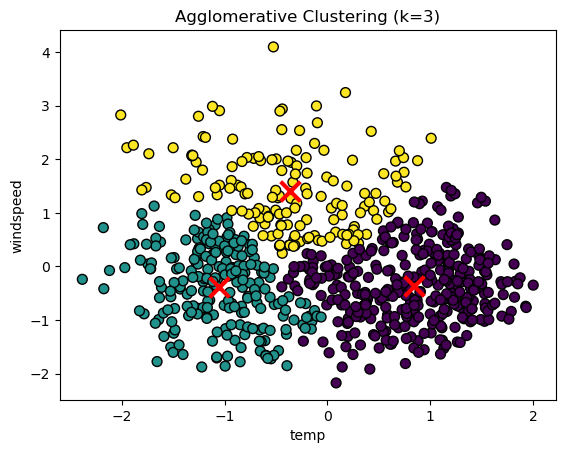

In [29]:
best_score_index = np.argmax(scores)

agglomerative = AgglomerativeClustering(n_clusters=n_clusters[best_score_index])
agglomerative_labels = agglomerative.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, agglomerative_labels)
print(f'Best Agglomeratice Clustering with k={n_clusters[best_score_index]}: Silhouette Score = {silhouette_avg}')
plot_agglomerative_clusters(X_scaled, n_clusters[best_score_index])

# DBScan

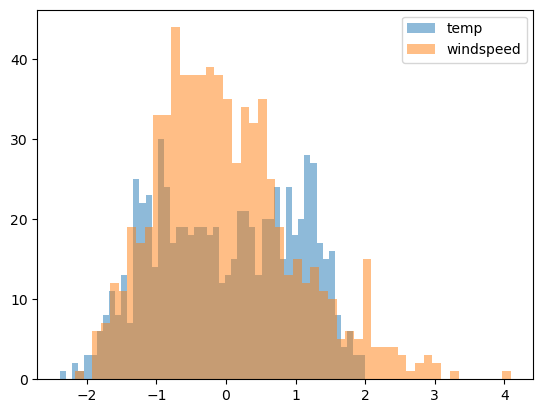

In [60]:
plt.hist(X_scaled[:, 0], bins=50, alpha=0.5, label=selected_features[0])
plt.hist(X_scaled[:, 1], bins=50, alpha=0.5, label=selected_features[1])
plt.legend()
plt.show()

In [58]:
# Function to visualize clusters for DBScan
def plot_dbscan_clusters(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(X)

    plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', edgecolors='k', s=50)
    plt.title(f'DBScan Clustering (eps={eps}, min_samples={min_samples})')
    plt.xlabel(selected_features[0])
    plt.ylabel(selected_features[1])
    plt.show()

In [69]:
best_hyperparemeter = {
    "eps_values": 0.2,
    "min_samples_values": 5
}

best_score = -np.inf

DBScan with eps=0.20, min_samples=5
Silhouette Score Result = -0.132


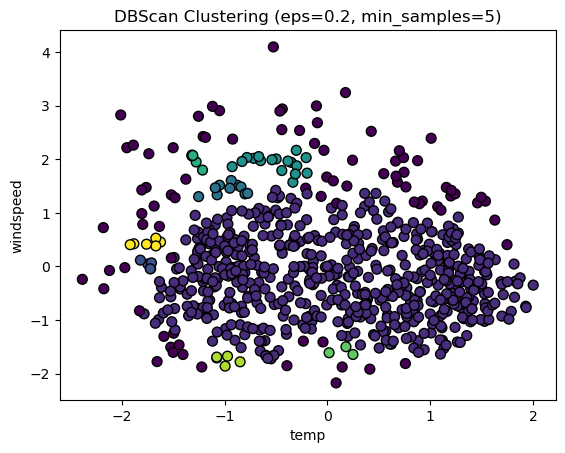

DBScan with eps=0.20, min_samples=10
Silhouette Score Result = 0.103


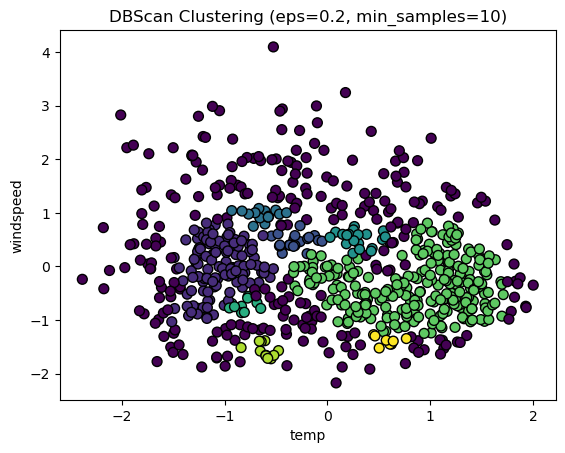

DBScan with eps=0.20, min_samples=15
Silhouette Score Result = 0.497


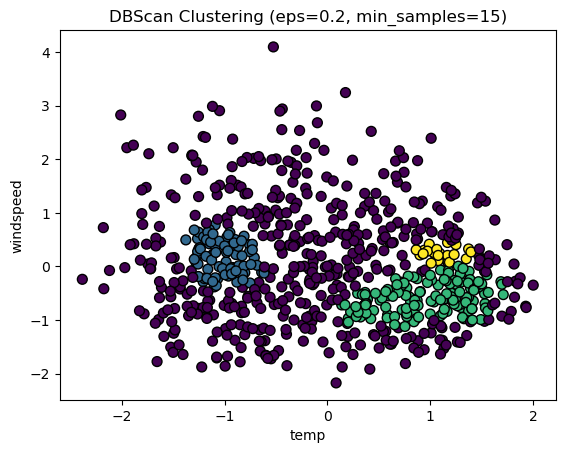

DBScan with eps=0.40, min_samples=5
Silhouette Score Result = Not enough distinct clusters or non-noise points to calculate silhouette score.


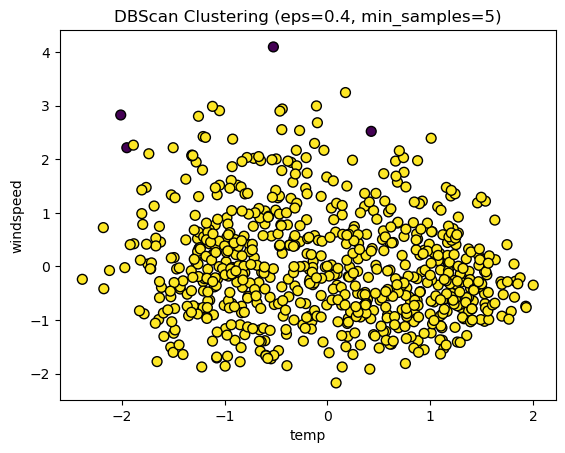

DBScan with eps=0.40, min_samples=10
Silhouette Score Result = Not enough distinct clusters or non-noise points to calculate silhouette score.


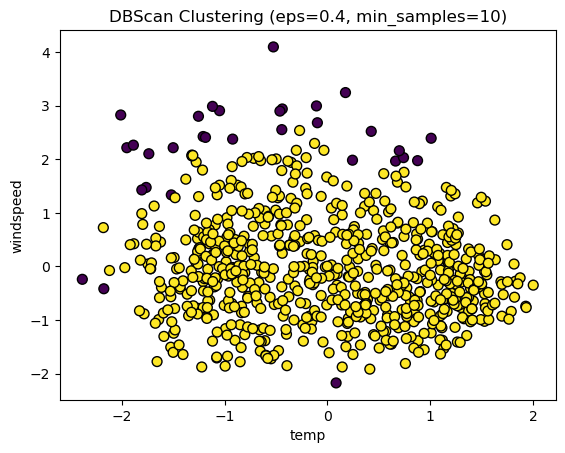

DBScan with eps=0.40, min_samples=15
Silhouette Score Result = Not enough distinct clusters or non-noise points to calculate silhouette score.


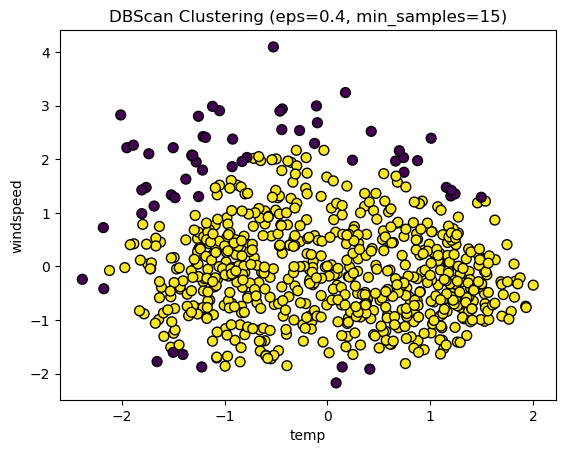

DBScan with eps=0.60, min_samples=5
Silhouette Score Result = Not enough distinct clusters or non-noise points to calculate silhouette score.


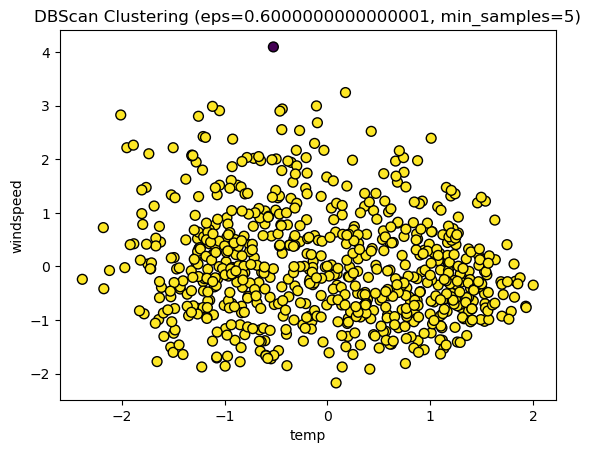

DBScan with eps=0.60, min_samples=10
Silhouette Score Result = Not enough distinct clusters or non-noise points to calculate silhouette score.


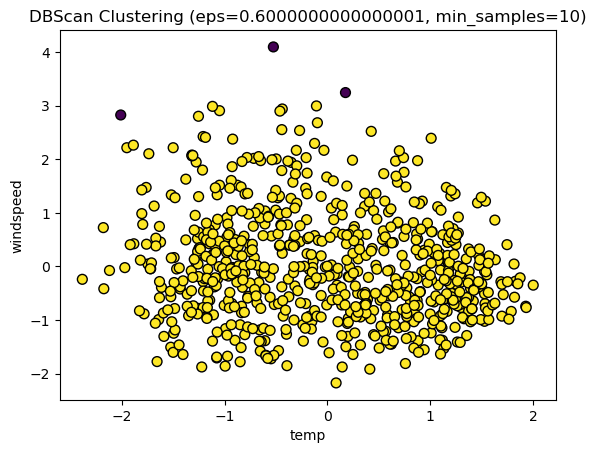

DBScan with eps=0.60, min_samples=15
Silhouette Score Result = Not enough distinct clusters or non-noise points to calculate silhouette score.


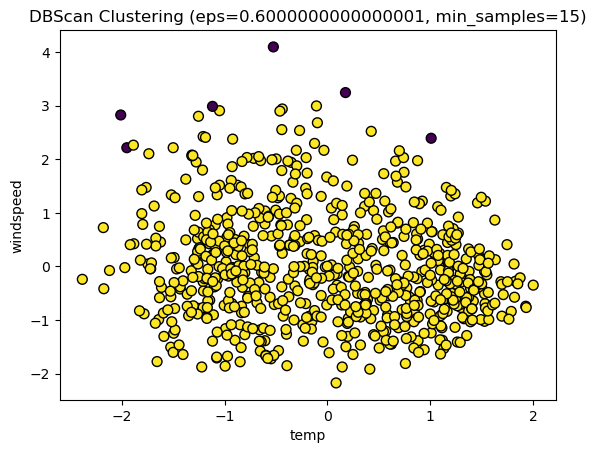

DBScan with eps=0.80, min_samples=5
Silhouette Score Result = Not enough distinct clusters or non-noise points to calculate silhouette score.


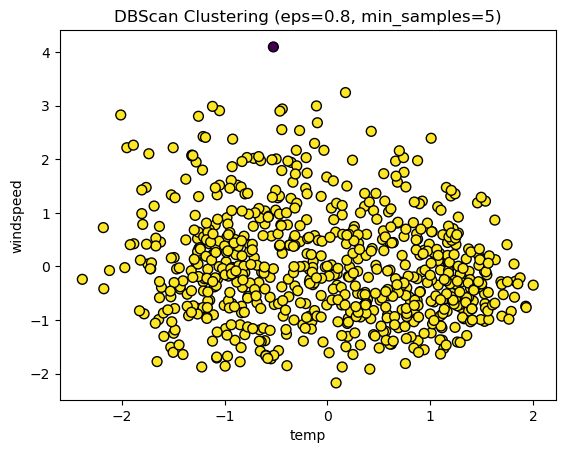

DBScan with eps=0.80, min_samples=10
Silhouette Score Result = Not enough distinct clusters or non-noise points to calculate silhouette score.


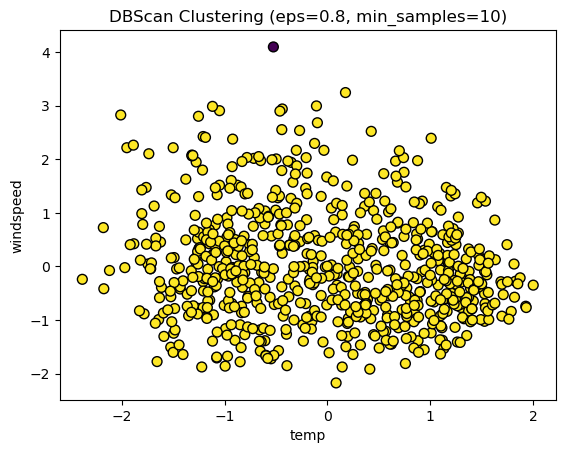

DBScan with eps=0.80, min_samples=15
Silhouette Score Result = Not enough distinct clusters or non-noise points to calculate silhouette score.


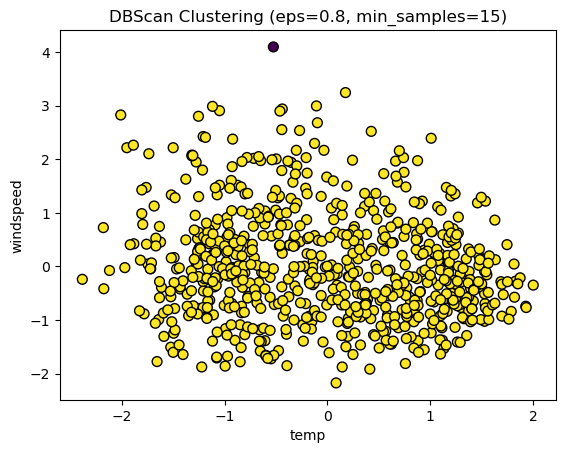

DBScan with eps=1.00, min_samples=5
Silhouette Score Result = Not enough distinct clusters or non-noise points to calculate silhouette score.


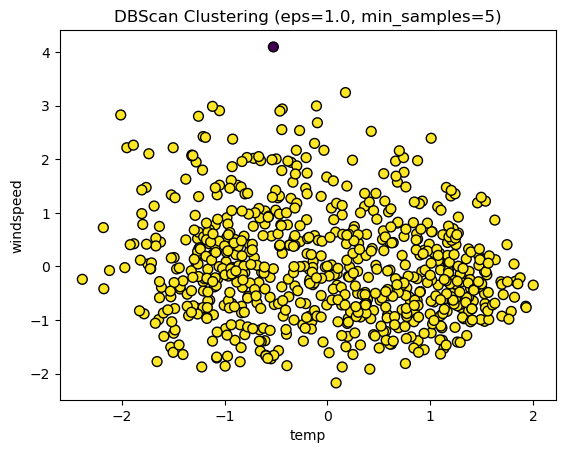

DBScan with eps=1.00, min_samples=10
Silhouette Score Result = Not enough distinct clusters or non-noise points to calculate silhouette score.


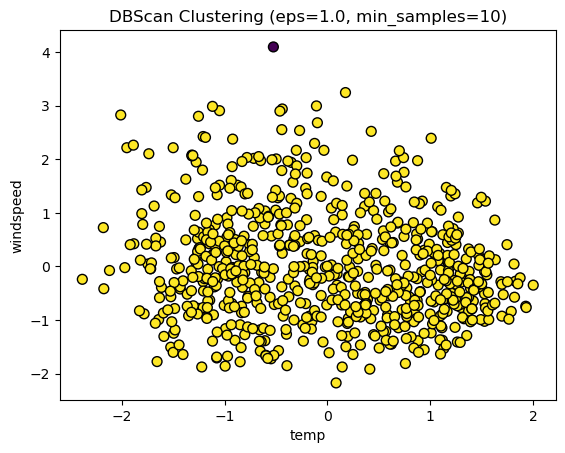

DBScan with eps=1.00, min_samples=15
Silhouette Score Result = Not enough distinct clusters or non-noise points to calculate silhouette score.


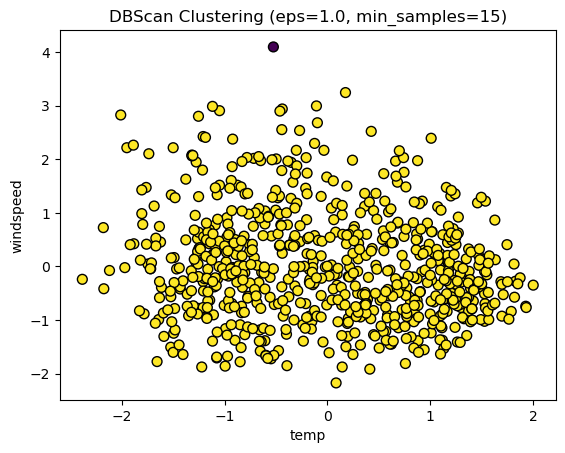

DBScan with eps=1.20, min_samples=5
Silhouette Score Result = DBSCAN resulted in only one unique label or all noise points.


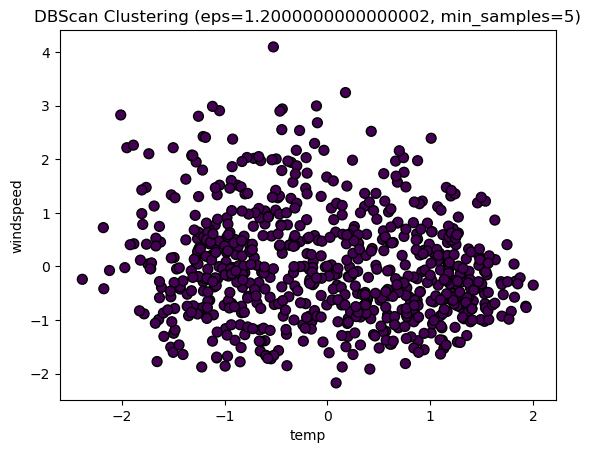

DBScan with eps=1.20, min_samples=10
Silhouette Score Result = DBSCAN resulted in only one unique label or all noise points.


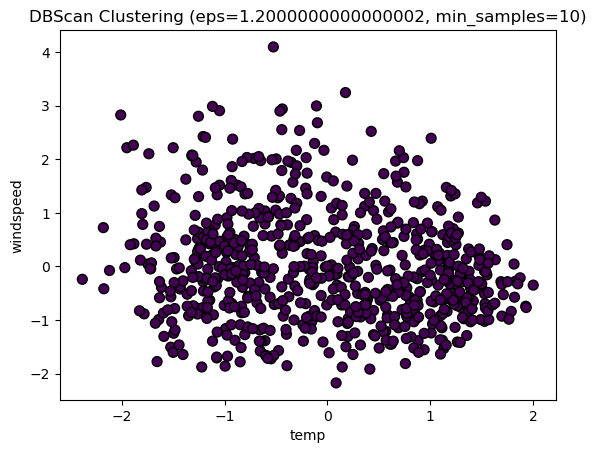

DBScan with eps=1.20, min_samples=15
Silhouette Score Result = DBSCAN resulted in only one unique label or all noise points.


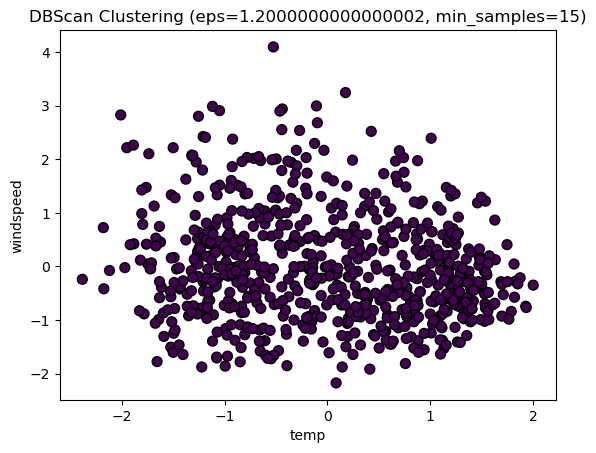

DBScan with eps=1.40, min_samples=5
Silhouette Score Result = DBSCAN resulted in only one unique label or all noise points.


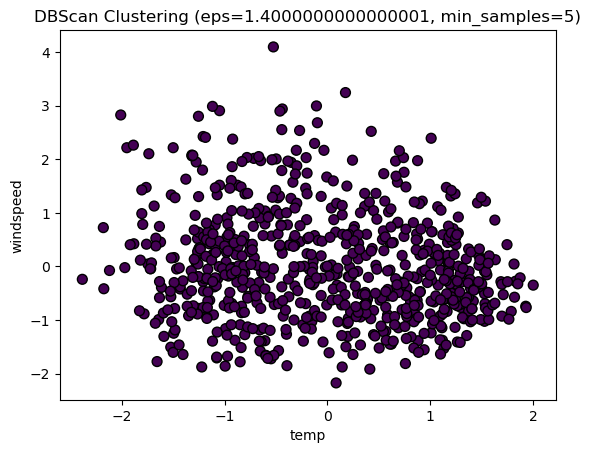

DBScan with eps=1.40, min_samples=10
Silhouette Score Result = DBSCAN resulted in only one unique label or all noise points.


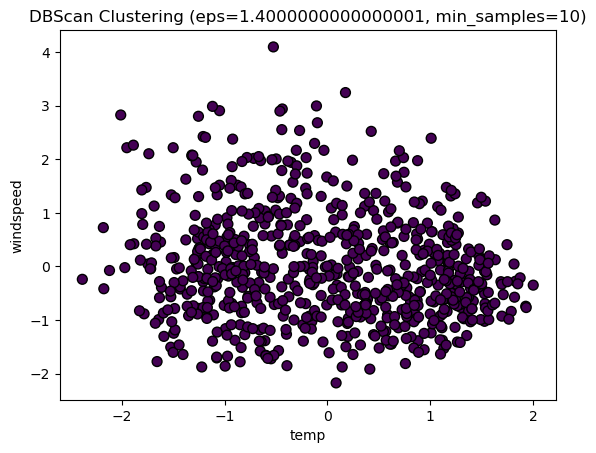

DBScan with eps=1.40, min_samples=15
Silhouette Score Result = DBSCAN resulted in only one unique label or all noise points.


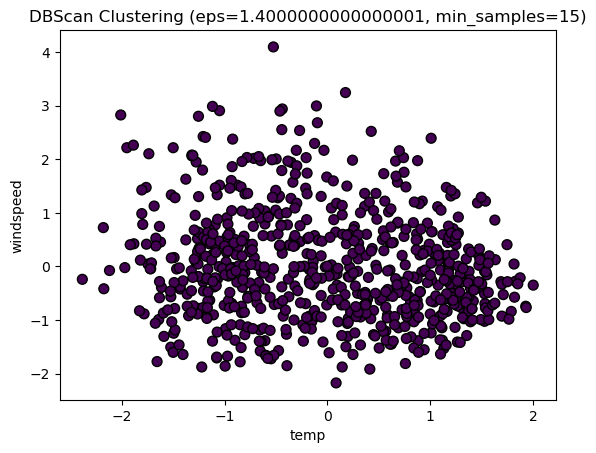

DBScan with eps=1.60, min_samples=5
Silhouette Score Result = DBSCAN resulted in only one unique label or all noise points.


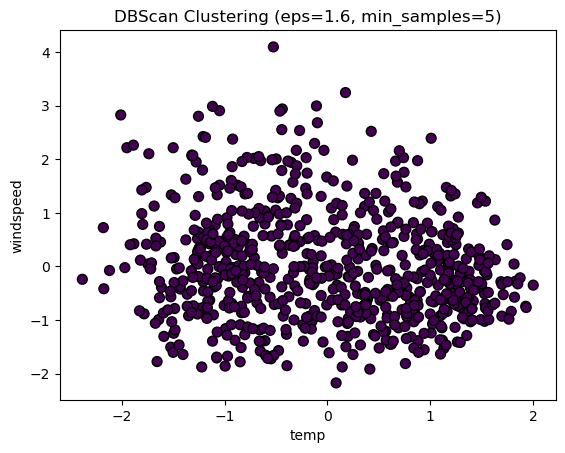

DBScan with eps=1.60, min_samples=10
Silhouette Score Result = DBSCAN resulted in only one unique label or all noise points.


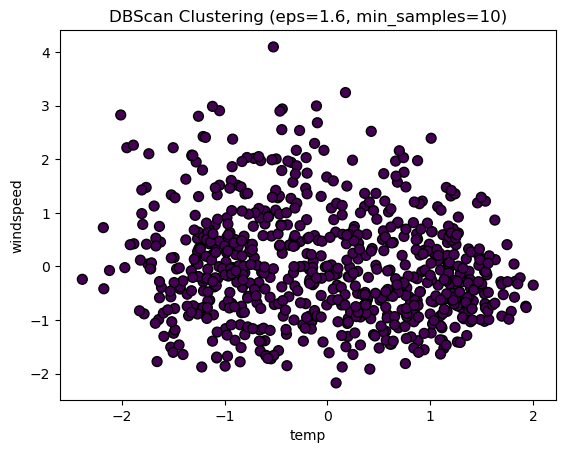

DBScan with eps=1.60, min_samples=15
Silhouette Score Result = DBSCAN resulted in only one unique label or all noise points.


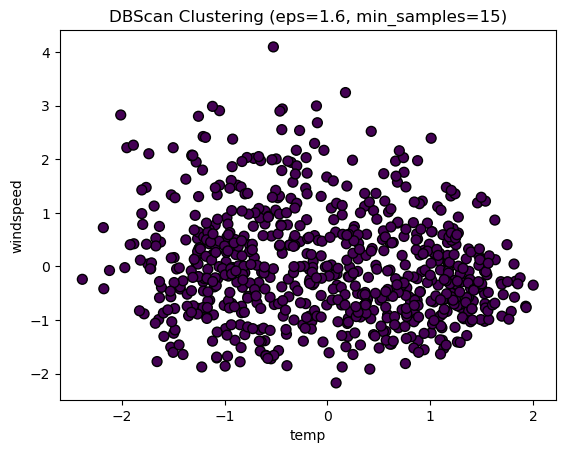

DBScan with eps=1.80, min_samples=5
Silhouette Score Result = DBSCAN resulted in only one unique label or all noise points.


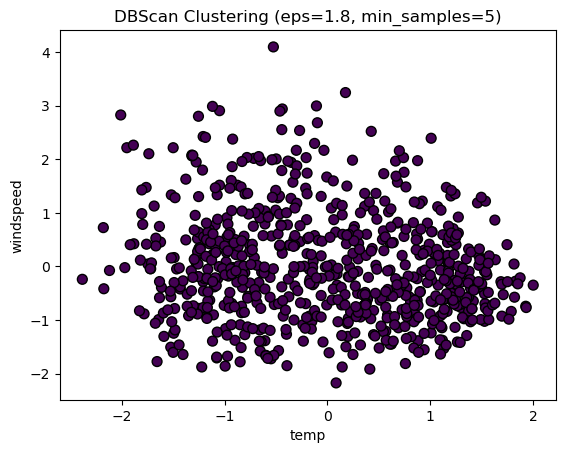

DBScan with eps=1.80, min_samples=10
Silhouette Score Result = DBSCAN resulted in only one unique label or all noise points.


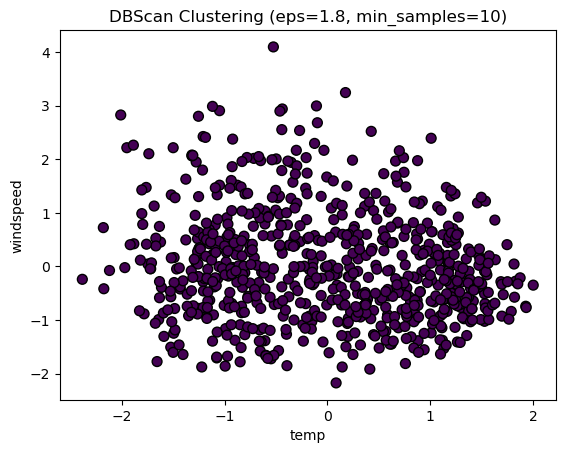

DBScan with eps=1.80, min_samples=15
Silhouette Score Result = DBSCAN resulted in only one unique label or all noise points.


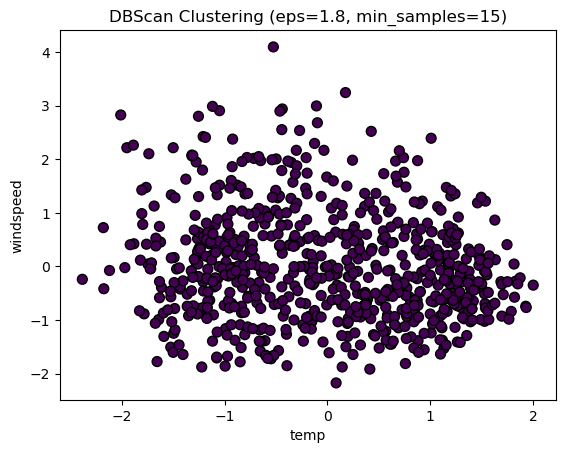

In [72]:
eps_values = [i * 0.2 for i in range(1,10)]
min_samples_values = [5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)
        score_result = ""
        
        # To calculate the silhouette score
        unique_labels = np.unique(dbscan_labels)
        if len(unique_labels) > 1:
            # Filter out noise points
            non_noise_mask = dbscan_labels != -1
            if np.sum(non_noise_mask) > 1 and len(np.unique(dbscan_labels[non_noise_mask])) > 1:
                silhouette_avg = silhouette_score(X_scaled[non_noise_mask], dbscan_labels[non_noise_mask])
                score_result = f"{silhouette_avg:.3f}"
            else:
                score_result = "Not enough distinct clusters or non-noise points to calculate silhouette score."
        else:
            score_result = "DBSCAN resulted in only one unique label or all noise points."

        print(f'DBScan with eps={eps:.2f}, min_samples={min_samples}\nSilhouette Score Result = {score_result}')
        plot_dbscan_clusters(X_scaled, eps, min_samples)

        try: 
            silhouette_result = float(score_result)
            if silhouette_result > best_score:
                best_score = silhouette_result
                best_hyperparemeter["eps_values"] = eps
                best_hyperparemeter["min_samples_values"] = min_samples
        except:
            continue

In [73]:
best_hyperparemeter

{'eps_values': 0.2, 'min_samples_values': 15}

In [74]:
best_score

0.497

DBScan with eps=0.20, min_samples=15
Silhouette Score Result = 0.497


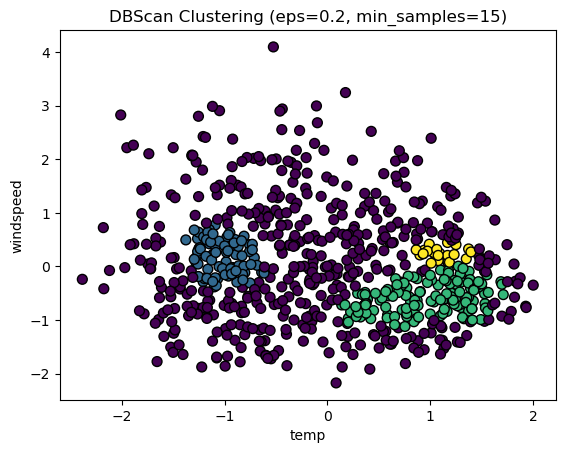

In [75]:
eps = best_hyperparemeter["eps_values"]
min_samples = best_hyperparemeter["min_samples_values"]

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)

# To calculate the silhouette score
unique_labels = np.unique(dbscan_labels)
if len(unique_labels) > 1:
    # Filter out noise points
    non_noise_mask = dbscan_labels != -1
    if np.sum(non_noise_mask) > 1 and len(np.unique(dbscan_labels[non_noise_mask])) > 1:
        silhouette_avg = silhouette_score(X_scaled[non_noise_mask], dbscan_labels[non_noise_mask])
        score_result = f"{silhouette_avg:.3f}"
    else:
        score_result = "Not enough distinct clusters or non-noise points to calculate silhouette score."
else:
    score_result = "DBSCAN resulted in only one unique label or all noise points."

print(f'DBScan with eps={eps:.2f}, min_samples={min_samples}\nSilhouette Score Result = {score_result}')
plot_dbscan_clusters(X_scaled, eps, min_samples)